# Avant de run le code, il est nécessaire d'installer deeplake avec "pip install deeplake" via le terminal de commande.
Cette librairie nous permet d'utiliser une base de données EMNIST, constituée de caractères de toute sorte.

In [1]:
import numpy
import tensorflow
import matplotlib.pyplot
import deeplake
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.models import Sequential
SGD = tensorflow.keras.optimizers.SGD

In [2]:
ds_train = deeplake.load("hub://activeloop/emnist-balanced-train")
ds_test = deeplake.load("hub://activeloop/emnist-balanced-test")

hub://activeloop/emnist-balanced-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/emnist-balanced-train
hub://activeloop/emnist-balanced-test loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/emnist-balanced-test


In [3]:
X_train=ds_train.images
Y_train=ds_train.labels
print(X_train.shape)
print("Les dimensions d'une image de la base de données Emnist balanced sont : ", X_train[2].shape)
print("Le nombre d'images dans la base de données Emnist balanced est : ", len(X_train))

(112800, 28, 28)
Les dimensions d'une image de la base de données Emnist balanced sont :  (28, 28)
Le nombre d'images dans la base de données Emnist balanced est :  112800


In [4]:
X_test=ds_test.images
Y_test=ds_test.labels

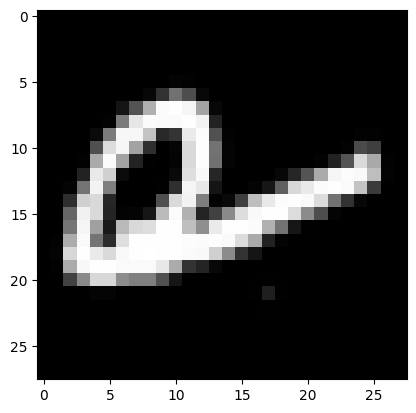

In [5]:
matplotlib.pyplot.imshow(X_test[2].numpy(), cmap=matplotlib.pyplot.cm.gray)

Voici la représentation numpy de la 5e image du dataset d'entrainement [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  77 125 125  77   3
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1  34  84 220 249 249 220  78
    7   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33  96 243 252 246 222 234 253 215
   37   0   0   0   0   0   0   0   

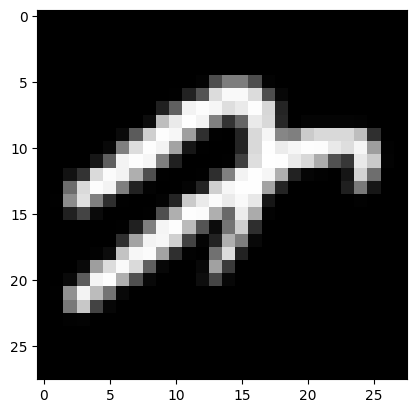

In [6]:
image_arr = X_train[4]
print("Voici la représentation numpy de la 5e image du dataset d'entrainement", image_arr.numpy())

matplotlib.pyplot.imshow(image_arr, cmap=matplotlib.pyplot.cm.gray)

Transforme les matrices 28x28 en vecteur de 784 lignes (cellule longue à charger)

In [7]:
X_train=X_train.numpy()
X_train=X_train.reshape(X_train.shape[0],784)

In [8]:
X_test=X_test.numpy()
X_test=X_test.reshape(X_test.shape[0],784)

In [9]:
X_train.shape

(112800, 784)

In [10]:
X_test.shape

(18800, 784)

Normalise les vecteurs

In [11]:
X_train =(X_train.astype('int32')-127.5)/127.5
X_test  = (X_test.astype('int32')-127.5)/127.5

In [12]:
dimension_entree = 784
epoch = 50
batchsize = 250
taux_apprentissage = 0.005

In [13]:
#Modèle de réseau de neurones avec 4 couches
model = Sequential()

model.add(Dense(250, input_shape=(dimension_entree,)))  
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(62))
model.add(Activation('sigmoid'))
model.add(Dense(47))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               196250    
                                                                 
 activation (Activation)     (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32128     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 62)                7998      
                                                                 
 activation_2 (Activation)   (None, 62)                0         
                                                                 
 dense_3 (Dense)             (None, 47)                2

In [14]:
# Définition des hyperparamètres de l'entraînement
sgd = SGD(lr=taux_apprentissage)

model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='sgd', 
    metrics=['accuracy']  
)

In [16]:
# Entraînement
model_train = model.fit(
    X_train, 
    Y_train,
    batch_size=batchsize,
    epochs=epoch,
    verbose=2
)

Epoch 1/50
452/452 - 32s - loss: 3.6293 - accuracy: 0.1660 - 32s/epoch - 72ms/step
Epoch 2/50
452/452 - 32s - loss: 3.5882 - accuracy: 0.1676 - 32s/epoch - 70ms/step
Epoch 3/50
452/452 - 26s - loss: 3.5456 - accuracy: 0.1752 - 26s/epoch - 58ms/step
Epoch 4/50
452/452 - 44s - loss: 3.5030 - accuracy: 0.1733 - 44s/epoch - 97ms/step
Epoch 5/50
452/452 - 37s - loss: 3.4610 - accuracy: 0.1756 - 37s/epoch - 81ms/step
Epoch 6/50
452/452 - 24s - loss: 3.4194 - accuracy: 0.1833 - 24s/epoch - 54ms/step
Epoch 7/50
452/452 - 25s - loss: 3.3770 - accuracy: 0.1884 - 25s/epoch - 56ms/step
Epoch 8/50
452/452 - 25s - loss: 3.3328 - accuracy: 0.1967 - 25s/epoch - 56ms/step
Epoch 9/50
452/452 - 25s - loss: 3.2859 - accuracy: 0.2091 - 25s/epoch - 54ms/step
Epoch 10/50
452/452 - 25s - loss: 3.2359 - accuracy: 0.2162 - 25s/epoch - 55ms/step
Epoch 11/50
452/452 - 25s - loss: 3.1833 - accuracy: 0.2251 - 25s/epoch - 55ms/step
Epoch 12/50
452/452 - 25s - loss: 3.1291 - accuracy: 0.2353 - 25s/epoch - 55ms/step
E

## La cellule suivante doit être run une seule et unique fois !!

In [17]:
# Test
model_test = model.evaluate(X_test, Y_test, batch_size=128)

147/147 [==============================] - 2s 3ms/step - loss: 1.9239 - accuracy: 0.4901


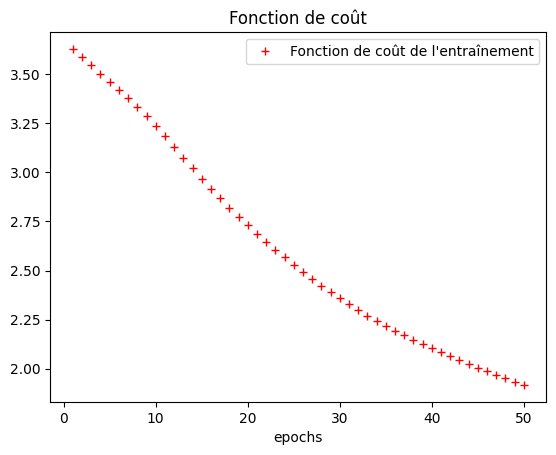

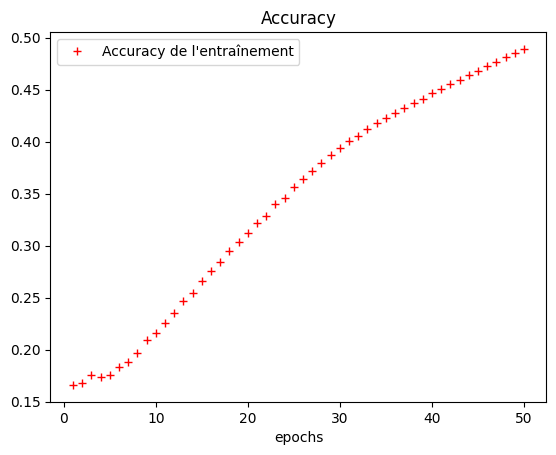

In [21]:
#On affiche les résultats

#Courbe de loss

epochs = range(1, epoch+1)

loss_train = model_train.history["loss"]
accuracy_train = model_train.history["accuracy"]


#Courbe de loss
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(epochs, loss_train, 'r+', label="Fonction de coût de l'entraînement")
matplotlib.pyplot.legend()
matplotlib.pyplot.xlabel("epochs")
matplotlib.pyplot.title("Fonction de coût")
matplotlib.pyplot.show()

#Courbe d'accuracy (métrique qui permet de valider le modèle)

matplotlib.pyplot.figure()
matplotlib.pyplot.plot(epochs, accuracy_train, 'r+', label="Accuracy de l'entraînement")
matplotlib.pyplot.legend()
matplotlib.pyplot.xlabel("epochs")
matplotlib.pyplot.title("Accuracy")
matplotlib.pyplot.show()

# Prédictions avec le modèle

In [41]:
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l",
"m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
len(labels)

36

In [22]:
predictions = model.predict(X_test)
predictions

588/588 [==============================] - 1s 1ms/step


array([[7.5760442e-03, 3.8584153e-04, 1.1678892e-02, ..., 5.2482564e-02,
        9.2000926e-05, 1.5533088e-03],
       [8.1923507e-02, 9.3938161e-06, 1.0133550e-03, ..., 1.4059701e-02,
        1.9164504e-02, 1.0920404e-03],
       [1.3750742e-04, 8.8458491e-04, 2.1917021e-04, ..., 1.4340079e-01,
        1.0322621e-03, 8.7499805e-03],
       ...,
       [3.0622780e-06, 2.3463824e-01, 2.7074751e-03, ..., 4.6951170e-03,
        9.0737629e-04, 6.8557352e-02],
       [6.7143135e-02, 1.8421370e-05, 6.3360953e-03, ..., 1.6377972e-02,
        1.1322877e-04, 3.5991857e-04],
       [2.5620227e-05, 2.4544217e-02, 1.3370014e-03, ..., 1.5004201e-02,
        1.1118487e-02, 8.3279915e-02]], dtype=float32)

In [59]:
test_labels = ds_test.labels.numpy()
test_labels.shape
test_labels[0][0]

41

In [60]:
fig = matplotlib.pyplot.figure()
for i in range(25):
    label = numpy.argmax(predictions[i])
    print(labels[test_labels[i][0]])
    ax = fig.add_subplot(5, 5, i + 1)
    ax.imshow(ds_test.images[i], cmap="gray")

IndexError: list index out of range

<Figure size 640x480 with 0 Axes>